In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from osu_util import read_osu_log, read_osu_log_multi, plot_osu

# Read logs

In [2]:
ls osu_log/pt2pt/

run1/  run10/ run2/  run3/  run4/  run5/  run6/  run7/  run8/  run9/


In [3]:
ls osu_log_pleiades/pt2pt/

run1/  run10/ run2/  run3/  run4/  run5/  run6/  run7/  run8/  run9/


In [4]:
def read_osu_all_runs(suffix, prefix='./osu_log/pt2pt/', runs=10):
    file_list = [
        prefix + 'run{}'.format(i) + suffix for i in range(1, 11)
    ]
    df = read_osu_log_multi(file_list, skiprows=2)
    return df

def stats(df):
    # similar to df.T.describe().T
    return df.apply(['mean', 'std', 'median', 'min', 'max'], axis=1)

In [5]:
mpi_cases = ['EC2 IntelMPI-EFA', 'EC2 OpenMPI-TCP', 'Pleiades Native', 'Pleiades TCP']

# Latency

In [6]:
lat_impi = read_osu_all_runs('/intelmpi-efa/latency.log').mean(axis=1)
lat_ompi = read_osu_all_runs('/openmpi3/latency.log').mean(axis=1)
lat_nas = read_osu_all_runs('/rdma/latency.log', prefix='./osu_log_pleiades/pt2pt/').mean(axis=1)
lat_nas_tcp = read_osu_all_runs('/tcp/latency.log', prefix='./osu_log_pleiades/pt2pt/').mean(axis=1)

In [7]:
lat_all = pd.concat(
    [lat_impi, lat_ompi, lat_nas, lat_nas_tcp], 
    keys=mpi_cases, axis=1
)

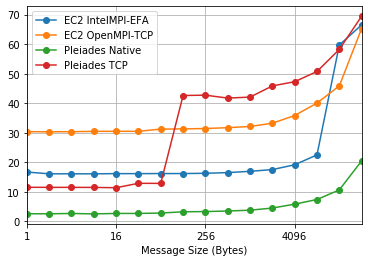

In [8]:
plot_osu(lat_all[1:17])

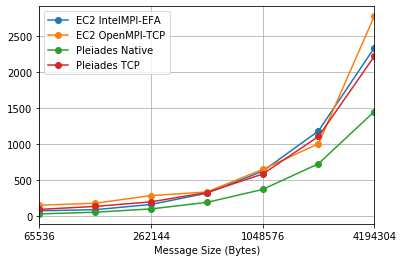

In [9]:
plot_osu(lat_all[17:], x_freq=2)

# Bandwidth

In [10]:
bw_impi = read_osu_all_runs('/intelmpi-efa/bw.log').mean(axis=1)
bw_ompi = read_osu_all_runs('/openmpi3/bw.log').mean(axis=1)
bw_nas = read_osu_all_runs('/rdma/bw.log', prefix='./osu_log_pleiades/pt2pt/').mean(axis=1)
bw_nas_tcp = read_osu_all_runs('/tcp/bw.log', prefix='./osu_log_pleiades/pt2pt/').mean(axis=1)

In [11]:
bw_all = pd.concat(
    [bw_impi, bw_ompi, bw_nas, bw_nas_tcp], 
    keys=mpi_cases, axis=1
)

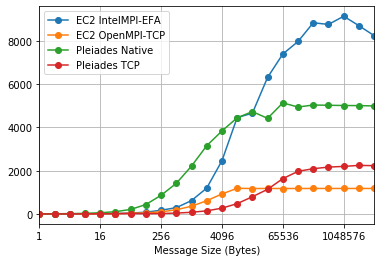

In [12]:
plot_osu(bw_all)

# Bidirectional Bandwidth

In [13]:
bibw_impi = read_osu_all_runs('/intelmpi-efa/bibw.log').mean(axis=1)
bibw_ompi = read_osu_all_runs('/openmpi3/bibw.log').mean(axis=1)
bibw_nas = read_osu_all_runs('/rdma/bibw.log', prefix='./osu_log_pleiades/pt2pt/').mean(axis=1)
bibw_nas_tcp = read_osu_all_runs('/tcp/bibw.log', prefix='./osu_log_pleiades/pt2pt/').mean(axis=1)

In [14]:
bibw_all = pd.concat(
    [bibw_impi, bibw_ompi, bibw_nas, bibw_nas_tcp], 
    keys=mpi_cases, axis=1
)

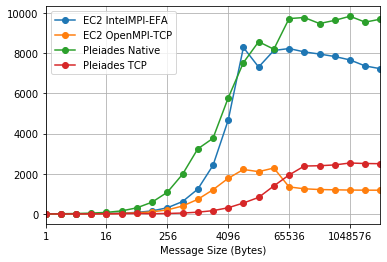

In [15]:
plot_osu(bibw_all)

# Put together

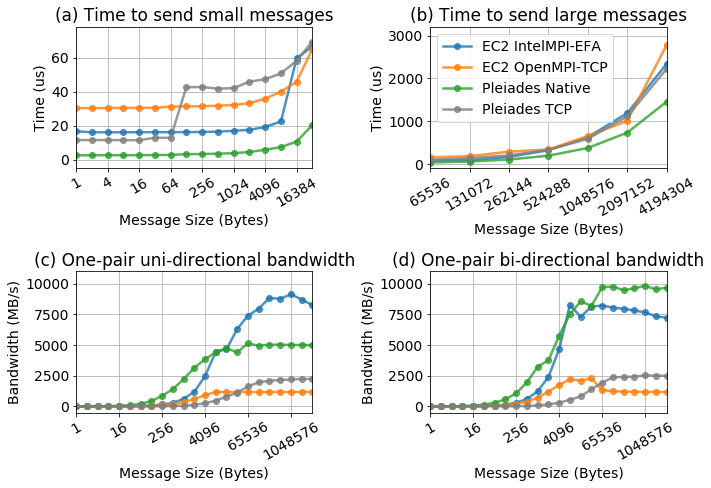

In [16]:
plt.rcParams['font.size'] = 14

fig, axes = plt.subplots(2, 2, figsize=[10, 7])

colors = ['C0', 'C1', 'C2', 'C7']
plot_kwargs = dict(color=colors, linewidth=2.5, alpha=0.8)

plot_osu(lat_all[1:17], x_freq=2,  ax=axes[0][0], legend=False, **plot_kwargs)
plot_osu(lat_all[17:], x_freq=1, ax=axes[0][1], legend=True, **plot_kwargs)
plot_osu(bw_all, ax=axes[1][0], x_freq=4, legend=False, **plot_kwargs)
plot_osu(bibw_all, ax=axes[1][1], x_freq=4, legend=False, **plot_kwargs)

axes[0][0].set_title('(a) Time to send small messages')
axes[0][1].set_title('(b) Time to send large messages')
axes[1][0].set_title('(c) One-pair uni-directional bandwidth')
axes[1][1].set_title('(d) One-pair bi-directional bandwidth')

for ax in axes[0]:
    ax.set_ylabel('Time (us)')
    
axes[0][0].set_ylim(-5, 78) 
axes[0][1].set_ylim(-100, 3200) 
    
for ax in axes[1]:
    ax.set_ylabel('Bandwidth (MB/s)')
    ax.set_ylim(-500, 11000)
    
for ax in axes.flatten():
    ax.tick_params(axis='x', labelrotation=30)  # https://stackoverflow.com/a/54353146
    
fig.tight_layout()
fig.savefig('pt2pt_compare.png', dpi=300)

# Raw data

In [17]:
lat_all

,EC2 IntelMPI-EFA,EC2 OpenMPI-TCP,Pleiades Native,Pleiades TCP
size,,,,
0,16.149,30.285,2.596,11.587
1,16.710,30.383,2.595,11.542
2,16.114,30.344,2.570,11.532
4,16.106,30.365,2.687,11.522
8,16.108,30.485,2.533,11.505
16,16.174,30.501,2.693,11.403
32,16.167,30.495,2.693,12.896
64,16.202,31.252,2.826,12.869
128,16.195,31.318,3.247,42.626


In [18]:
bw_all

,EC2 IntelMPI-EFA,EC2 OpenMPI-TCP,Pleiades Native,Pleiades TCP
size,,,,
1,0.460,0.423,3.422,0.285
2,1.162,0.848,6.667,0.633
4,1.877,1.704,13.701,1.267
8,5.089,3.401,26.666,2.564
16,10.225,6.838,53.566,5.070
32,19.387,13.623,103.726,9.391
64,41.538,27.182,207.535,18.752
128,77.845,48.776,433.743,9.690
256,171.865,95.169,862.402,19.379


In [19]:
bibw_all

,EC2 IntelMPI-EFA,EC2 OpenMPI-TCP,Pleiades Native,Pleiades TCP
size,,,,
1,0.474,0.826,5.022,0.445
2,2.249,1.681,10.126,0.910
4,4.588,3.379,19.890,1.859
8,9.161,6.723,39.449,3.679
16,18.581,13.466,76.969,7.357
32,37.466,26.851,150.803,12.214
64,75.023,53.283,303.820,24.799
128,150.873,103.458,586.275,11.422
256,305.996,200.305,1077.240,22.666
